# Notes

# Load Modules

In [1]:
import numpy as np
import pandas as pd

import anndata as adata
import scanpy as sc
import squidpy as sq
from SpaceFlow import SpaceFlow

# Load Data

In [2]:
exp_df = pd.read_csv("mouse1_slice221_counts.csv", index_col=0)
exp_df.head()

,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Gad2,Tac2,Lamp5,Cnr1,Pvalb,Sst,Rab3b,Slc17a7,Penk,Gad1
index,,,,,,,,,,,,,,,,,,,,,
100029194729477472162047791686277547250,0.0,0.639048,0.000000,0.000000,1.278096,0.0,0.0,0.000000,0.000000,0.0,...,2.310253,0.829325,0.474121,0.132923,0.327166,0.060279,0.690492,8.538511,0.299263,0.000000
100141638384685944504186567613653468492,0.0,1.257111,0.628556,0.000000,1.257111,0.0,0.0,0.000000,0.000000,0.0,...,1.582022,0.742696,0.301457,0.000000,0.473207,0.110925,0.455704,6.424842,0.267111,0.062081
100199724260696365101982675842433317515,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,1.019630,0.615762,0.207185,0.000000,0.172705,0.039713,0.437275,6.408589,0.153680,0.182817
100216512810042512738054357433364423486,0.0,0.611595,0.000000,0.611595,1.223191,0.0,0.0,0.611595,7.950741,0.0,...,3.065554,1.206609,0.157893,0.000000,0.646352,0.339363,0.872653,10.740067,0.403160,0.000000
100375818383721597063890253100110999488,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,3.459550,0.0,...,1.132629,0.929838,1.250991,0.000000,0.206087,0.268405,1.293051,16.535923,0.413652,0.000000


In [3]:
meta_info_df = pd.read_csv("merfish_mouse1_slice221_24_subclass_meta.csv", index_col=0)
meta_info_df.head()

,Sample,Cell_Type,x,y
Cell_ID,,,,
100029194729477472162047791686277547250,mouse1_slice221,L2/3 IT,140.941997,-2678.142903
100141638384685944504186567613653468492,mouse1_slice221,L4/5 IT,490.147986,-3128.267907
100199724260696365101982675842433317515,mouse1_slice221,L4/5 IT,610.440383,-3286.204808
100216512810042512738054357433364423486,mouse1_slice221,L6 CT,-993.445405,-3621.462904
100375818383721597063890253100110999488,mouse1_slice221,L5 ET,-1210.454855,-3070.839903


In [4]:
ad = adata.AnnData(exp_df)

In [5]:
ad.obs = ad.obs.join(meta_info_df)
ad.obs.head()

,Sample,Cell_Type,x,y
index,,,,
100029194729477472162047791686277547250,mouse1_slice221,L2/3 IT,140.941997,-2678.142903
100141638384685944504186567613653468492,mouse1_slice221,L4/5 IT,490.147986,-3128.267907
100199724260696365101982675842433317515,mouse1_slice221,L4/5 IT,610.440383,-3286.204808
100216512810042512738054357433364423486,mouse1_slice221,L6 CT,-993.445405,-3621.462904
100375818383721597063890253100110999488,mouse1_slice221,L5 ET,-1210.454855,-3070.839903


In [6]:
ad.obsm['spatial'] = ad.obs[['x', 'y']].values

# SpaceFlow

In [7]:
sf = SpaceFlow.SpaceFlow(adata=ad)

In [8]:
sf.preprocessing_data(n_top_genes=3000)

In [9]:
sf.train(spatial_regularization_strength=0.1, z_dim=50, lr=1e-3, epochs=1000, max_patience=50, min_stop=100, random_seed=42, gpu=0, regularization_acceleration=True, edge_subset_sz=1000000)

Epoch 2/1000, Loss: 3.0752651691436768
Epoch 12/1000, Loss: 1.3307634592056274
Epoch 22/1000, Loss: 1.192383050918579
Epoch 32/1000, Loss: 0.9875540137290955
Epoch 42/1000, Loss: 0.7453631162643433
Epoch 52/1000, Loss: 0.5520651340484619
Epoch 62/1000, Loss: 0.3973483443260193
Epoch 72/1000, Loss: 0.28388792276382446
Epoch 82/1000, Loss: 0.24018721282482147
Epoch 92/1000, Loss: 0.2089693248271942
Epoch 102/1000, Loss: 0.19917239248752594
Epoch 112/1000, Loss: 0.18425633013248444
Epoch 122/1000, Loss: 0.1569722443819046
Epoch 132/1000, Loss: 0.15070435404777527
Epoch 142/1000, Loss: 0.1377089023590088
Epoch 152/1000, Loss: 0.13114844262599945
Epoch 162/1000, Loss: 0.13360722362995148
Epoch 172/1000, Loss: 0.11866723001003265
Epoch 182/1000, Loss: 0.108701691031456
Epoch 192/1000, Loss: 0.12664517760276794
Epoch 202/1000, Loss: 0.10438628494739532
Epoch 212/1000, Loss: 0.11246344447135925
Epoch 222/1000, Loss: 0.09558224678039551
Epoch 232/1000, Loss: 0.09058406949043274
Epoch 242/1000, 

array([[ 5.7445784 , -0.6173095 , -0.30278257, ...,  2.1238809 ,
        -0.03326385,  4.4283395 ],
       [ 5.5397363 ,  1.795573  , -0.79611814, ...,  1.6170249 ,
        -1.1860937 ,  5.4594483 ],
       [ 4.284995  ,  1.8112001 , -0.27091178, ...,  0.6132101 ,
        -0.87702733,  4.918262  ],
       ...,
       [ 3.1709356 ,  1.8726271 , -0.45107388, ...,  0.06685683,
        -0.99609095,  5.581154  ],
       [ 5.490991  , -0.6045971 , -0.57141656, ..., -0.66416025,
        -0.6438079 ,  1.8260405 ],
       [ 6.3722343 , -0.9088052 , -0.37000507, ...,  1.8349056 ,
        -0.19194499,  4.3507867 ]], dtype=float32)

In [10]:
sf.segmentation(domain_label_save_filepath="./domains.tsv", n_neighbors=50, resolution=1.0)

Performing domain segmentation


/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/sc/arion/work/wangw32/conda-env/envs/spaceflow/lib/python3.9/site-packages/SpaceFlow/SpaceFlow.py:306: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(embedding_adata, resolution=float(resolution))


Segmentation complete, domain labels of cells or spots saved at ./domains.tsv !


No segmentation data found, please ensure you have run the segmentation() method.


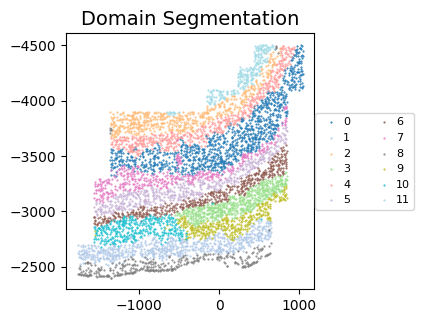

In [11]:
sf.plot_segmentation(segmentation_figure_save_filepath="./domain_segmentation.pdf", colormap="tab20", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

In [12]:
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [13]:
sf.plot_pSM(pSM_figure_save_filepath="./pseudo-Spatiotemporal-Map.pdf", colormap="roma", scatter_sz=1., rsz=4., csz=4., wspace=.4, hspace=.5, left=0.125, right=0.9, bottom=0.1, top=0.9)

Plotting complete, pseudo-Spatiotemporal Map figure saved at ./pseudo-Spatiotemporal-Map.pdf !
